In [6]:
!pip install windrose --user
import pandas as pd
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from windrose import plot_windrose
import matplotlib.ticker as tkr
import matplotlib.gridspec as gridspec
import calendar
import numpy as np

In [2]:
wrd = pd.read_excel('./WindData_15-24jan2019.xlsx')
wrd_df = wrd[['WindDir','WindSpeed','MaxWindDT']]
wrd_df['MaxWindDT'] = pd.to_datetime(wrd_df['MaxWindDT'],format='%d/%m/%Y %H:%M:%S')
wrd_df.set_index('MaxWindDT',inplace=True)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
wrd.head()

,WindDir,WindSpeed,MinWindSpeed,MaxWindSpeed,MaxWindDir,MaxWindDT
0,23.4,0.52,0.0,1.6,60,15/01/2019 00:04:15
1,10.4,0.54,0.0,1.6,343,15/01/2019 01:28:01
2,5.0,0.64,0.1,1.7,353,15/01/2019 02:56:23
3,3.5,0.75,0.0,1.7,6,15/01/2019 03:48:42
4,1.1,0.96,0.2,2.7,343,15/01/2019 04:33:33


In [4]:
mto = wrd_df
wsp, wdir = 'WindSpeed', 'WindDir'
mto['day'] = mto.index.day
nbcol = 2
nblines = 5

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


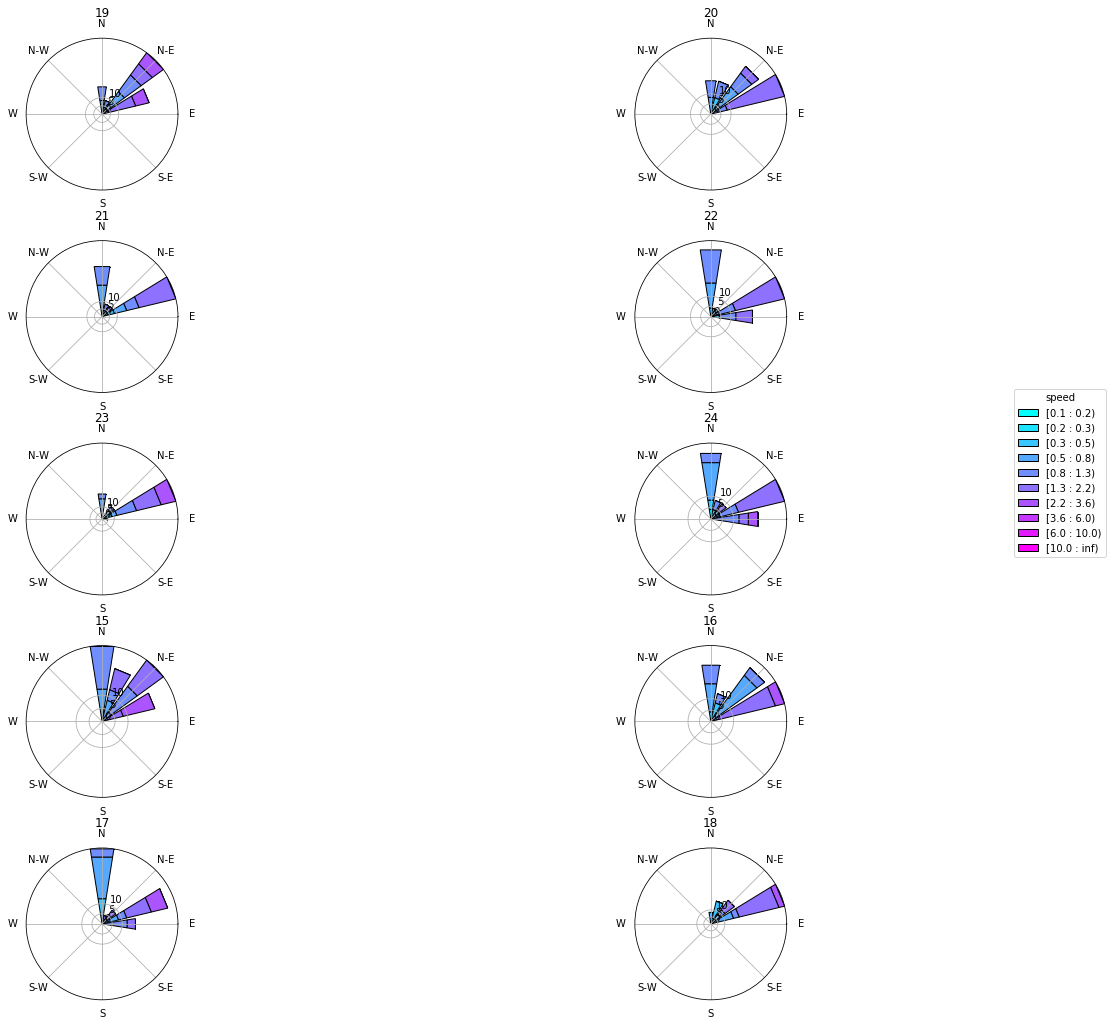

In [19]:
fig = plt.figure(figsize=(20, 18))

gs = gridspec.GridSpec(5, 2)
bottom, top, left, right = gs.get_grid_positions(fig)

for month, m in mto.groupby('day'):
    month = int(month)
    row, col = ((month+1)//2)%5 , (month+1)%2
    rect = [left[col],
            bottom[row],
            right[col]-left[col],
            0.9*(top[row]-bottom[row])]     # [left, bottom, width, height]

    ax = WindroseAxes(fig, rect)
    fig.add_axes(ax)
    ax.bar(m[wdir], m[wsp], normed=True, opening=0.8, edgecolor='black', bins=np.logspace(-1, 1, 10),cmap=cm.cool)
    ax.set_title(month, position=(0.5, 1.1))
    ax.set_yticks(np.arange(0, 15, 5))
    ax.yaxis.set_major_formatter(tkr.FormatStrFormatter('%2.0f'))
ax.set_legend()
ax.legend(title="speed", loc=(2.5, 0.25))